In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Motor_analyst.xlsx", "Data", header=0)

/var/folders/17/fjyjx9_n295d_wjlg4tf3k1c0000gn/T/ipykernel_32081/3592341686.py:5: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  df = pd.read_excel("Motor_analyst.xlsx", "Data", header=0)


In [2]:
df.head(3)

,id,start_date,exposure,net_earned_premium,net_written_premium,claim_count,is_capped_incurred,incurred,capped_incurred,bi_incurred,...,vehicle_make,d1_age,d1_residency_years,d1_is_uk_resident,transmission,region,gender,vehicle_purchase_date,licence_test_date,primary_car_colour
0,16042,2019-02-28,0.002740,0.00000,0.0000,0,NaN,NaN,NaN,NaN,...,FIAT,20,20,1,MANUAL,East Midlands,Male,2019-02-01,2016-11-26,Blue
1,41414,2019-03-20,1.000000,238.33650,238.3365,0,NaN,NaN,NaN,NaN,...,FORD,25,25,1,MANUAL,South East,Female,2017-11-01,2012-03-12,Grey
2,58837,2019-11-29,0.420765,77.31347,183.7450,0,NaN,NaN,NaN,NaN,...,PEUGEOT,42,42,1,MANUAL,West Midlands,Female,2016-09-01,1994-11-09,Silver


In [3]:
df['start_date'] = pd.to_datetime(df['start_date'])
df['vehicle_purchase_date'] = pd.to_datetime(df['vehicle_purchase_date'])
df['licence_test_date'] = pd.to_datetime(df['licence_test_date'])

# Adding columns for year and month
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month


# Calculate claims frequency (claims per exposure unit)
df['claims_frequency'] = df['claim_count'] / df['exposure']

# Calculate average claim size (incurred / claim count) only for claim counts that are not zero. 
df['average_claim_size'] = df.apply(lambda row: row['incurred'] / row['claim_count'] if row['claim_count'] > 0 else np.nan, axis=1)

# Calculate profitability (net earned premium - incurred)
df['profitability'] = df['net_earned_premium'] - df['incurred']

# Summarize key metrics
metrics = df.groupby('year').agg(
    total_claims=('claim_count', 'sum'),
    average_claim_size=('average_claim_size', 'mean'),
    claims_frequency=('claims_frequency', 'mean'),
    profitability=('profitability', 'mean')
).reset_index()

metrics

,year,total_claims,average_claim_size,claims_frequency,profitability
0,2018,4065,2680.989732,0.132028,-2427.044432
1,2019,3700,2546.577374,0.140224,-2296.078667
2,2020,169,3040.434337,0.103344,-3077.170307


In [5]:
vehicle_age_metrics = df.groupby('vehicle_age').agg(
    total_claims=('claim_count', 'sum'),
    average_claim_size=('average_claim_size', 'mean'),
    claims_frequency=('claims_frequency', 'mean'),
    profitability=('profitability', 'mean')
).reset_index()

vehicle_age_metrics

,vehicle_age,total_claims,average_claim_size,claims_frequency,profitability
0,-1,13,1300.325455,0.038690,-861.399618
1,0,340,1938.495406,0.117499,-1794.018068
2,1,295,2864.744854,0.104951,-2688.000181
3,2,383,2439.119406,0.123979,-2098.798222
4,3,507,2876.737252,0.115473,-2652.221399
5,4,622,3104.940542,0.164257,-2801.077082
6,5,544,2135.804559,0.101272,-1864.459065
7,6,566,2610.663843,0.110299,-2301.894958
8,7,537,2216.805508,0.110274,-1954.065639
9,8,523,2840.242821,0.098334,-2595.549101


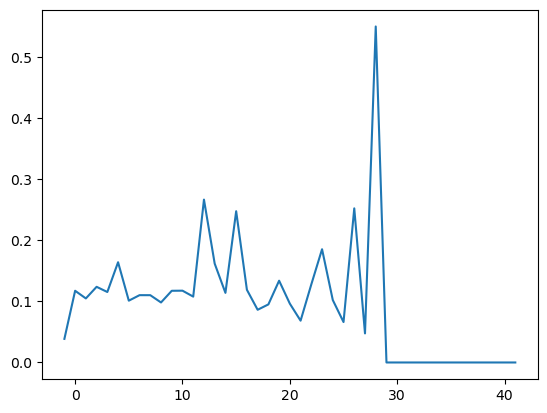

In [6]:
plt.plot(vehicle_age_metrics['vehicle_age'], vehicle_age_metrics['claims_frequency'])

In [7]:
vehicle_make_metrics= df.groupby('vehicle_make').agg(total_claims=('claim_count', 'sum'),
    average_claim_size=('average_claim_size', 'mean'),
    claims_frequency=('claims_frequency', 'mean'),
    profitability=('profitability', 'mean')
).reset_index()

vehicle_make_metrics.sort_values(by=['profitability', 'total_claims'])

,vehicle_make,total_claims,average_claim_size,claims_frequency,profitability
34,LEXUS,8,8429.830000,0.046257,-8098.777271
53,SAAB,27,7615.429259,0.114277,-7306.028691
13,DAIHATSU,6,5840.068000,0.196734,-5996.993000
12,DAEWOO,2,6466.430000,0.090909,-5955.394000
33,LANDROVER,59,5251.783148,0.592621,-5032.680543
...,...,...,...,...,...
47,PERODUA,0,NaN,0.000000,NaN
50,PROTON,0,NaN,0.000000,NaN
60,TESLA,0,NaN,0.000000,NaN
62,TOYOTACOROLLA,0,NaN,0.000000,NaN


id                        0.005994
exposure                  0.023592
net_earned_premium       -0.078584
net_written_premium      -0.065137
claim_count              -0.055268
incurred                 -0.999558
capped_incurred          -0.671263
voluntary_xs             -0.017594
ncd                       0.050679
vehicle_value             0.008761
vehicle_annual_mileage    0.004988
vehicle_age              -0.005498
d1_age                    0.032095
d1_residency_years        0.034502
d1_is_uk_resident         0.026323
year                      0.001432
month                    -0.016553
claims_frequency          0.001326
average_claim_size       -0.993579
profitability             1.000000
Name: profitability, dtype: float64


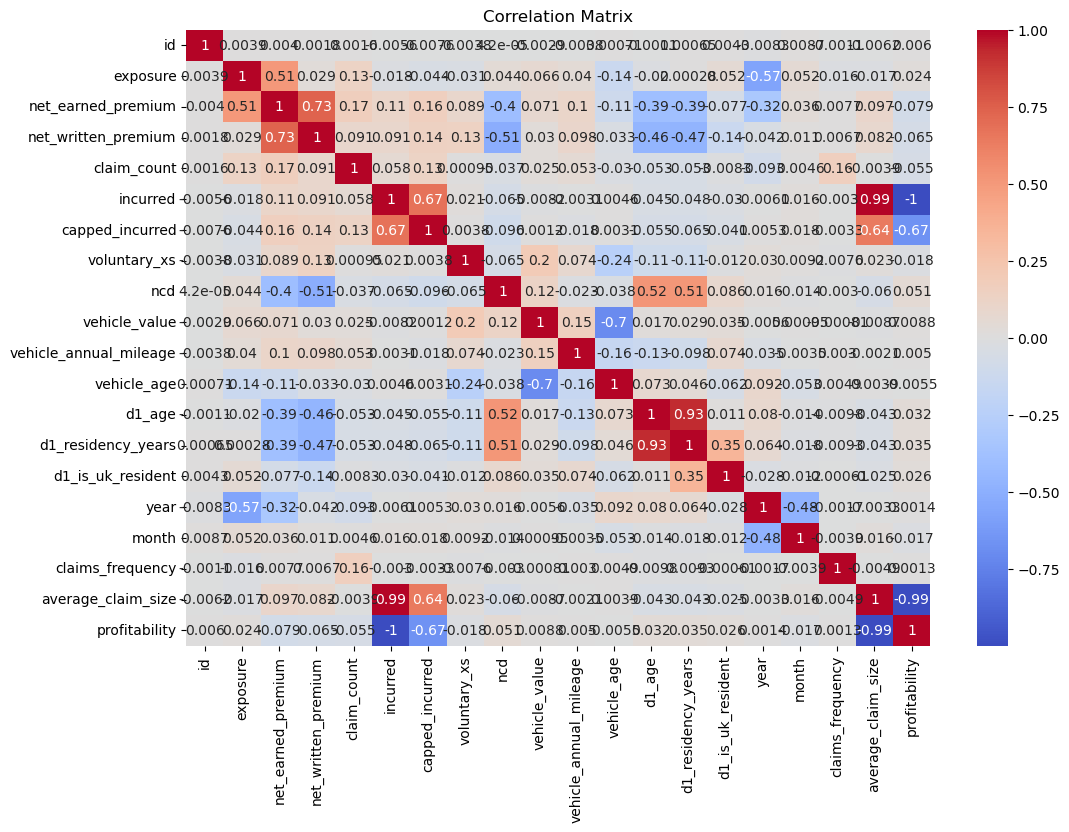

In [11]:

df_cleaned = df.drop(columns=['is_capped_incurred', 'bi_incurred', 'ad_incurred', 'pd_incurred', 'th_incurred', 'ws_incurred', 'bi_count', 'ad_count', 'pd_count', 'th_count', 'ws_count', 'business_provider', 'cover', 'vehicle_make', 'vehicle_purchase_date', 'licence_test_date', 'primary_car_colour'])

# Correlation matrix
corr_matrix = df_cleaned.corr()
print(corr_matrix['profitability'])

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_cleaned.dropna(subset=['profitability'], inplace=True)
X = df_cleaned.drop(columns=['profitability', 'start_date', 'id'])
y = df_cleaned['profitability']

# One-hot encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Replacing NaN in training data
X_train.fillna(X_train.mean(), inplace= True)


# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(coefficients.sort_values(by='Coefficient', ascending=False))

Mean Squared Error: 2.043060305110261e-21
R-squared: 1.0
                   Feature   Coefficient
1       net_earned_premium  1.000000e+00
32            region_North  5.374313e-13
24         entitlement_NAM  4.896265e-13
19           vehicle_use_C  1.994093e-13
20           vehicle_use_S  1.725131e-13
7                      ncd  1.470651e-13
30           region_London  9.803295e-14
27    overnight_location_R  9.460057e-14
33       region_North West  7.664443e-14
34     region_Outer London  7.433373e-14
39    region_West Midlands  6.794677e-14
28     transmission_MANUAL  5.131228e-14
25         entitlement_TWO  4.057962e-14
35         region_Scotland  1.514905e-14
23         entitlement_IOD  1.116005e-14
22         entitlement_IAS  1.072568e-14
38            region_Wales  1.066795e-14
11                  d1_age  3.345071e-15
6             voluntary_xs  1.862606e-15
17      average_claim_size  1.468241e-15
2      net_written_premium  1.301171e-15
8            vehicle_value -4.748513e-16
